In [581]:

import numpy as np
import matplotlib.pyplot as plt
import random


In [582]:
n_points_of_range = 100
Sigma = 0.1

def sin_my(x, a, b):
    return np.sin(a * x + b)

def sin_my_ver(x, A):
    return A * np.cos(x)

def sin_a(x, a):
    return np.sin(a * x)

def generate_different_signals(x = None, samples = 10000, with_noise = False):
    # sin(a * x + b), where is x is a and b from different U(t1, t2)
    t1, t2 = -3, 3.
    l1, l2 = 0., 2.
    a_array = np.random.rand(samples) * (t2 - t1) + t1
    b_array = np.random.rand(samples) * (l2 - l1) + l1
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    f = np.asarray([sin_my(x, a, b) for (a, b) in zip(a_array, b_array)])
    return f if not with_noise else f + generate_noise(samples = samples)  

def generate_different_signals_ver_2(x = None, samples = 10000, with_noise = False):
    a1, a2 = 1., 2.
    a_arr = np.random.rand(samples) * (a2 - a1) + a1
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    f = np.asarray([sin_my_ver(x, A) for A in a_arr])
    return f if not with_noise else f + generate_noise(samples = samples) 

def generate_different_signals_ver_3(x = None, samples = 10000, with_noise = False):
    a1, a2 = 1., 3.
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    f = np.asarray([sin_my_ver(x, np.random.rand(n_points_of_range) * (a2 - a1) + a1) for idx in range(samples)])
    return f if not with_noise else f + generate_noise(samples = samples) 

def generate_different_signals_ver_4(x = None, samples = 10000, with_noise = False):
    mu, s = 10., 3.
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    f = np.asarray([sin_my_ver(x, np.random.randn(n_points_of_range)*s + mu) for idx in range(samples)])
    return f if not with_noise else f + generate_noise(samples = samples) 

def generate_different_signals_sin(x = None, samples = 10000, with_noise = False):
    mu, s = 3., 0.5
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    f = np.asarray([sin_a(x, np.random.randn(n_points_of_range) * s + mu) for idx in range(samples)])
    return  f if not with_noise else f + generate_noise(samples = samples) 

def show_graph(f_list):
    if(len(f_list.shape) == 1):
        f_list = f_list[np.newaxis,:]
        print(f_list.shape)
    assert(f_list.shape[1] == n_points_of_range)
    color_list = ['b', 'y', 'g', 'r', 'black', 'gray']
    fig, ax = plt.subplots(figsize = (10, 7))
    x = np.linspace(0, 2 * np.pi, n_points_of_range)        
    for idx in range(f_list.shape[0] if f_list.shape[0] <= 5 else 5):
        ax.plot(x,f_list[idx], c = color_list[idx])
    ax.grid()
    ax.plot(np.zeros((100, )), np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100), c = 'black')
    ax.plot(np.linspace(0, 2 * np.pi, 100), np.zeros((100, )), c = 'black')

def sigma_f(f_list):
    # Предположение в том, что рассчитаем выборочную корреляцтию между данными величинами
    f_mean = average_f(f_list)
    if len(f_mean.shape) == 1:
        f_mean = f_mean[np.newaxis, :]
    N = f_list.shape[0]
    diffF = f_list.T - f_mean.T
    assert(diffF.shape[0] == n_points_of_range)
    return (1/(N-1)) * np.dot(diffF, diffF.T)

def average_f(f_list):
    assert(f_list.shape[0] >= 10 and f_list.shape[1] == n_points_of_range)
    return f_list.mean(axis = 0)

def generate_noise(sigma = Sigma, samples = 1000):
    return sigma * np.random.randn(samples, n_points_of_range)
    


$f = \sin(ax + b) \;\; a \sim U[\alpha_{1}, \beta_{1}], \;\; b \sim U[\alpha_{2}, \beta_{2}], \; x \in [0, 2\pi]$
проводим независимые эксперименты 


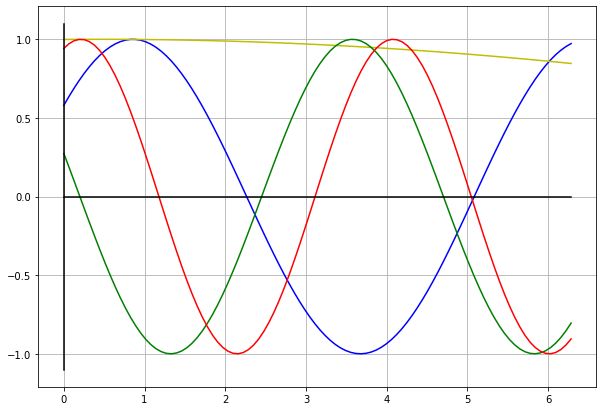

In [584]:
show_graph(generate_different_signals(samples = 4))

In [585]:
# Редукция (для сигналов сгенерированных по типу: A * cos(x), x = 0, ..., 2pi)
# A ~ N(mu, sigma), где для каждого mu = 10, sigma = 3.
# Для каждого отдельного отсчёта мы независимо генерируем A_i амплитуду из вышеописанного распределения

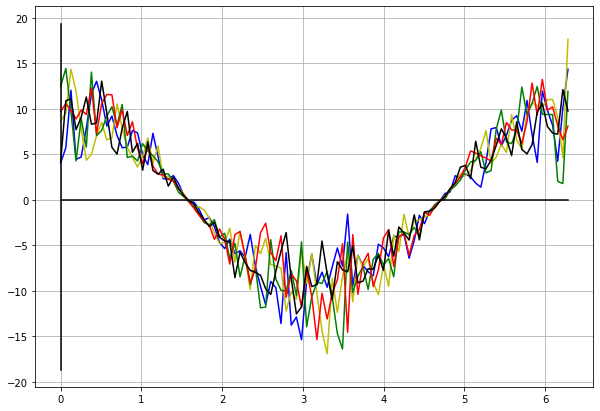

In [586]:
show_graph(generate_different_signals_ver_4(samples = 5))

In [587]:
import numpy.linalg as lg
l_new = 30
Sigma = 0.6
def operator_A_ver_2(n = n_points_of_range, l = l_new):
    A = np.zeros((2*(l-1) + n - l + 1, n))
    for idx in range(n):
        A[idx: idx + l, idx] = 1.
    return A * (1/l)
operator_A_ver_2(n = 7, l = 3)

def gauss(x):
    return (1/np.sqrt(np.pi * 2)) * np.exp(-x ** 2 /2)

def operator_A_ver_3(n = n_points_of_range, l = 10):
    A = np.zeros((2*(l-1) + n - l + 1, n))
    z = np.linspace(-1.5, 1.5, l)
    l_piece = np.asarray([gauss(x) for x in z])
    for idx in range(n):
        A[idx: idx + l, idx] = 1.
    for idx in range(A.shape[0]):
        indeces = np.where((A[idx] != 0))
        A[idx][indeces[0]] = l_piece[:len(indeces[0])]
        
    return A
        
def model_better(l = l_new, sigma = Sigma):
    gener_f = generate_different_signals(samples = 10000)
    A = operator_A_ver_3(l = l)
    Sigma_nu = np.identity(A.shape[0]) * sigma ** 2
    avr_f = average_f(gener_f)[None, :]
    SigmaF = sigma_f(gener_f)
    return (A, Sigma_nu, avr_f, SigmaF)

def gener_xi_better(l = l_new, samples = 1):
    f = generate_different_signals(samples = samples)
    A = operator_A_ver_3(l = l)
    if(f.shape[1] == n_points_of_range and len(f.shape) != 1):
        f = f.T
    A_f = np.dot(A, f)
    m, _ = A_f.shape
    x_range = np.linspace(0, 2 * np.pi, n_points_of_range)
    diff = np.abs(x_range[1]-x_range[0])
    x_new = [diff *(-(l//2) + idx) for idx in range(l//2)] + x_range.tolist() + \
                            [x_range[-1] + idx * diff for idx in range(l//2 if l % 2 else l//2 - 1)]
    return A_f + Sigma * np.random.randn(m,1), np.asarray(x_new), f
    
def model_ver_2(l = l_new, sigma = Sigma):
    generate_signal_f = generate_different_signals_ver_4(samples = 1000)
    A = operator_A_ver_3(l = l)
    Sigma_nu = np.identity(A.shape[0]) * sigma ** 2
    avr_f = average_f(generate_signal_f)[None, :]
    SigmaF = sigma_f(generate_signal_f)
    return (A, Sigma_nu, avr_f, SigmaF)

def generate_xi_ver_2(l = l_new, samples = 1):
    f = generate_different_signals_ver_4(samples = samples)
    A = operator_A_ver_3(l = l)
    if(f.shape[1] == n_points_of_range and len(f.shape) != 1):
        f = f.T
    A_f = np.dot(A, f)
    m, _ = A_f.shape
    x_range = np.linspace(0, 2 * np.pi, n_points_of_range)
    diff = np.abs(x_range[1]-x_range[0])
    x_new = [diff *(-(l//2) + idx) for idx in range(l//2)] + x_range.tolist() + \
                            [x_range[-1] + idx * diff for idx in range(l//2 if l % 2 else l//2 - 1)]
    return A_f + Sigma * np.random.randn(m,1), np.asarray(x_new), f

def estimate_f_ver_2(model = (A, S_nu, f_0, F), xi = xi):
    A, S_nu, f_0, F = model
    if(f_0.shape[0] != n_points_of_range):
        f_0 = f_0.T
    #print("xi : {}, A : {}, f_0 : {}, S : {}, F: {}".format(xi.shape, A.shape, f_0.shape, S_nu.shape, F.shape))
    Q = np.dot(A, np.dot(F, A.T)) + S_nu
    #print('Q : {}'.format(Q.shape))
    return f_0 + np.dot(np.dot(F, np.dot(A.T, lg.inv(Q))), xi - np.dot(A, f_0))

def average_f_theor():
    mu = 10.
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    return sin_my_ver(x, 1.) * mu

def sigma_f_theor():
    x = np.linspace(0, 2 * np.pi, n_points_of_range)
    mu = 10.
    sigma_ = 3.
    F_sigma = np.identity(n_points_of_range) 
    for idx in range(n_points_of_range):
        F_sigma[idx][idx] = sin_my_ver(x[idx], 1.) ** 2 * sigma_ ** 2
    return F_sigma

def model_ver_3(l = l_new, sigma = Sigma):
    generate_signal_f = generate_different_signals_ver_4(samples = 1000)
    A = operator_A_ver_3(l = l)
    Sigma_nu = np.identity(A.shape[0]) * sigma ** 2
    avr_f = average_f_theor()[None, :]
    SigmaF = sigma_f_theor()
    return (A, Sigma_nu, avr_f, SigmaF)
    

xi, x_new_range, ftrue = generate_xi_ver_2(l = l_new, samples = 1)

In [588]:
xi_b, x_new_range_b, ftrue_b = gener_xi_better(l = l_new, samples=1)

In [589]:
np.sin(1)*np.sin(2)/2

0.3825737006171463

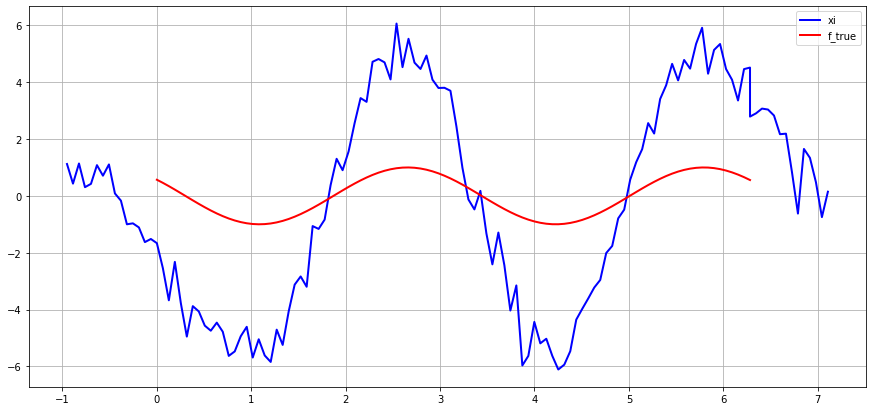

In [590]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.plot(x_new_range_b, xi_b, c = 'b', label = 'xi', linewidth = 2.)
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), ftrue_b, c = 'r', label = 'f_true', linewidth = 2.)
#ax.plot(x_range, empiric_ave, c = 'black', label = 'average_f', linewidth = 2.)
ax.grid()
ax.legend()

In [591]:

xi_b, x_new_b, ftrue_b = gener_xi_better(l = l_new, samples = 1)
A_b, S_nu_b, f_0_b, F_b =  model_better(l = l_new, sigma = 0.1)
est_b = estimate_f_ver_2(model = (A_b, S_nu_b, f_0_b, F_b), xi = xi_b)

In [592]:
emp_mse_2 = mse(est_b, ftrue_b)
emp_mse_2

0.3212863718147924

$f = \sin(ax + b) , \;\; b \sim U[\alpha_{2}, \beta_{2}] = U[0, 2]$

$ E(f(0)) = E(\sin(b)) = \frac{1}{\beta_{2} - \alpha{2}}\int_{\alpha_{2}}^{\beta_{2}} \sin(x) dx = \frac{1}{2}\sin(\frac{\alpha_{2} + \beta{2}}{2})\sin(\frac{\alpha_{2} - \beta{2}}{2}) = \frac{1}{2}\sin(1)\sin(2)  \cong 0.38$

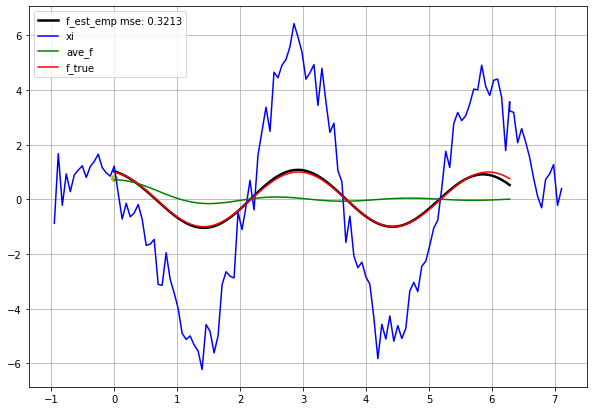

In [594]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), est_b, 
                c = 'black', label = 'f_est_emp mse: {}'.format(round(emp_mse_2, 4)), linewidth = 2.5)
ax.plot(x_new_b, xi_b, c = 'b', label = 'xi')
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), average_f(generate_different_signals(samples = 10000)), 
        c = 'g', label = 'ave_f')
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), ftrue_b, c = 'r', label = 'f_true')
ax.scatter(0, np.sin(1)*np.sin(2), c = 'y')
ax.grid()
ax.legend()

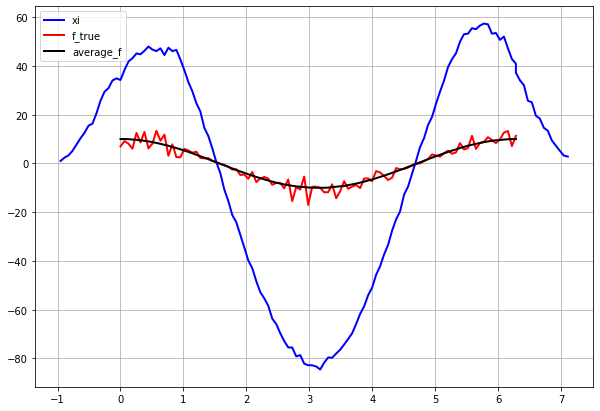

In [203]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(x_new_range, xi, c = 'b', label = 'xi', linewidth = 2.)
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), ftrue, c = 'r', label = 'f_true', linewidth = 2.)
ax.plot(x_range, empiric_ave, c = 'black', label = 'average_f', linewidth = 2.)
ax.grid()
ax.legend()

In [42]:

xi_new, x_new_range, ftrue_new = generate_xi_ver_2(l = l_new, samples = 1)
A_new, S_nu_new, f_0_new, F_new =  model_ver_2(l = l_new, sigma = 0.1)
est_new = estimate_f_ver_2(model = (A_new, S_nu_new, f_0_new, F_new), xi = xi_new)

A_new_t, S_nu_new_t, f_0_new_t, F_new_t =  model_ver_3(l = l_new, sigma = 0.1)
est_theor = estimate_f_ver_2( model = (A_new_t, S_nu_new_t, f_0_new_t, F_new_t), xi = xi_new)

xi : (109, 1), A : (109, 100), f_0 : (100, 1), S : (109, 109), F: (100, 100)
Q : (109, 109)
xi : (109, 1), A : (109, 100), f_0 : (100, 1), S : (109, 109), F: (100, 100)
Q : (109, 109)


In [43]:
emp_mse = mse(est_new, ftrue_new)
theor_mse = mse(est_theor, ftrue_new)
emp_mse, theor_mse = emp_mse+10, theor_mse+10
emp_mse, theor_mse

(10.219580381428795, 10.219752612506047)

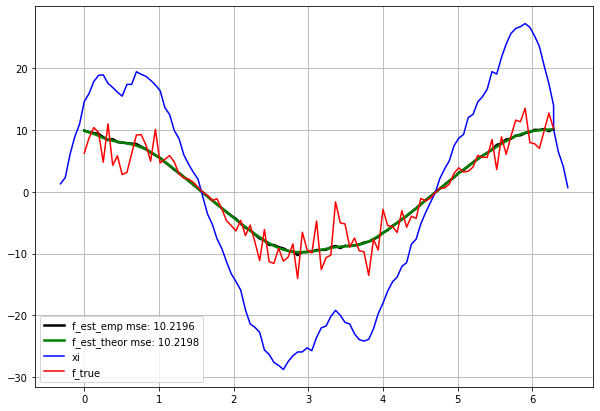

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), est_new, 
                c = 'black', label = 'f_est_emp mse: {}'.format(round(emp_mse, 4)), linewidth = 2.5)
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), est_theor, c = 'green', 
                            label = 'f_est_theor mse: {}'.format(round(theor_mse, 4)), linewidth = 2.5)
ax.plot(x_new_range, xi_new, c = 'b', label = 'xi')
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), ftrue_new, c = 'r', label = 'f_true')
ax.grid()
ax.legend()

In [486]:
def operator_A(n = n_points_of_range, l = l_new):
    # Можно взять в качестве примера, когда у нас оператор понижает размерность задачи
    # Например ходит окном по сигналу, ширины l < n (лучше небольшое)
    # И в данном окне берёт среднее значение сигнала f 
    # Смешает окно на 1 вправо 
    # Оператор будет (R_n -> R_n-l+1)
    A = np.zeros((n - l + 1, n))
    for idx in range(n - l + 1):
        A[idx][idx: idx + l] = 1.
    return (1/l) * A
#operator_A(n = 5, l = 2)
        
    

In [38]:
def get_models(l = l_new, sigma = Sigma):
    # get params as [A, Sigma_nu, f_0, Sigma_F]
    generate_signal_f = generate_different_signals(samples = 1000)
    A = operator_A(l = l)
    Sigma_nu = np.identity(n_points_of_range - l + 1) * sigma ** 2
    avr_f = average_f(generate_signal_f)[None, :]
    SigmaF = sigma_f(generate_signal_f)
    return (A, Sigma_nu, avr_f, SigmaF) # should be (A : (R_n-l+1 -> R_n), S_nu : n-l+1 -> n-l+1, avr_f : (1, n), F : (n, n))

A, S_nu, f_0 , F = get_models(l = 20)

In [17]:
def generate_xi(l = l, samples = 1):
    # Только задаём параметры окна
    f = generate_different_signals(samples = samples)
    A = operator_A(l = l)
    if(f.shape[1] == n_points_of_range and len(f.shape) != 1):
        f = f.T
    A_f = np.dot(A, f)
    m, _ = A_f.shape
    # Соберём ещё точки, для которых рассчитано это среднее
    x_range = np.linspace(0, 2 * np.pi, n_points_of_range)
    x_new = x_range[(l-1)//2: len(x_range) - (l - (l-1)//2) + 1]
    return A_f + Sigma * np.random.randn(m,1), x_new, f

xi, range_x,f_true = generate_xi() # Мы должны выбрать некоторый один (1) сигнал из нашего распределения сигналов

In [19]:
xi.shape
A, S_nu, f_0 , F = get_models()

In [20]:
F_theoretics = np.identity(n_points_of_range) * (1/12)

In [458]:
import numpy.linalg as lg

def estimate_f(model = (A, S_nu, f_0, F), xi = xi):
    A, S_nu, f_0, F = model
    if(f_0.shape[0] != n_points_of_range):
        f_0 = f_0.T
    print("xi : {}, A : {}, f_0 : {}, S : {}, F: {}".format(xi.shape, A.shape, f_0.shape, S_nu.shape, F.shape))
    Q = np.dot(A, np.dot(F, A.T)) + lg.inv(S_nu)
    print('Q : {}'.format(Q.shape))
    return f_0 + np.dot(np.dot(F, np.dot(A.T, lg.inv(Q))), xi - np.dot(A, f_0))
#est_cov = estimate_f(model= (A, S_nu, f_0, F), xi = xi)
#est_f_theor.shape

In [528]:

def mse(y_true, y_pred):
    #return (1/y_true.shape[0]) * ((y_true - y_pred)**2).sum()
    return ((y_true - y_pred)**2).sum()

In [460]:
import torch

In [461]:
class Several_Layer_Net(torch.nn.Module):
    
    def __init__(self, size_list):
        super(Several_Layer_Net, self).__init__()
        assert(len(size_list) >= 2) 
        self.list_layer = [] 
        self.num_of_layers = len(size_list) - 2 # without
        if (size_list.__len__() == 2): # D_in, D_out only
            D_in, D_out = size_list[0], size_list[-1]
            self.list_layer.append(torch.nn.Linear(D_in, D_out)) # only one linear layer
        else:
            for idx in range(len(size_list)-1):
                self.list_layer.append(torch.nn.Linear(size_list[idx], size_list[idx+1]))
            assert(self.list_layer.__len__() == len(size_list) - 1) # Число слоёв на 1 меньше переданных размеров данных
            
    def forward(self, x):
        # all Relu
        if self.num_of_layers == 0: # hidden = 0 without hidden layers
            return self.list_layer[0](x) # Просто линейное преобразование 
        else: # Как минимум один должен быть скрытый слой с активацией
            h_relu = self.list_layer[0](x).clamp(min = 0)
            for idx in range(1, self.num_of_layers + 1):
                h_relu = self.list_layer[idx](h_relu).clamp(min = 0)
            y_pred = self.list_layer[-1](h_relu)
            return y_pred



In [462]:
N = 500
x_list_signals = []
xi_list_signals = []
for i in range(N):
    xi, _, x = generate_xi_ver_2()
    x_list_signals.append(x)
    xi_list_signals.append(xi)

x_signals = np.asarray(x_list_signals, dtype = np.float32)
xi_signals = np.asarray(xi_list_signals,  dtype = np.float32)

In [463]:
x_signals.shape, xi_signals.shape

((500, 100, 1), (500, 129, 1))

In [464]:
x_signals = np.squeeze(x_signals)
xi_signals = np.squeeze(xi_signals)


In [465]:
xi_signals_t = torch.from_numpy(xi_signals)
x_signals_t = torch.from_numpy(x_signals)

In [466]:
D_in = xi_signals[0].shape[0]
D_out = x_signals[0].shape[0]
H = 100


In [467]:
model_simple = torch.nn.Sequential(
                torch.nn.Linear(D_in, H),
                torch.nn.ReLU(),
                torch.nn.Linear(H, D_out)
                
)

In [468]:
model_lin = torch.nn.Sequential(
                torch.nn.Linear(D_in, D_out)
                
)

In [469]:
D_in = xi_signals[0].shape[0]
size_list = [D_in, D_out]
model_nn = Several_Layer_Net(size_list=size_list)
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model_simple.parameters(), lr = 1e-4)
for t in range(500):
    y_pred = model_simple(xi_signals_t)
    loss = criterion(y_pred, x_signals_t)
    if(t % 50 == 0):
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
        

0 4008959.0
50 2135554654208.0
100 56951252.0
150 229410.171875
200 227903.5625
250 227903.53125
300 227903.53125
350 227903.53125
400 227903.53125
450 227903.53125


In [470]:
criterion_2 = torch.nn.MSELoss(reduction = 'sum')
optimizer_2 = torch.optim.SGD(model_lin.parameters(), lr = 1e-4)
for t in range(500):
    y_pred = model_lin(xi_signals_t)
    loss = criterion_2(y_pred, x_signals_t)
    if(t % 50 == 0):
        #print(t, loss.item())
        pass
        
    optimizer_2.zero_grad()
    loss.backward()
    optimizer_2.step()

xi : (129, 1), A : (129, 100), f_0 : (100, 1), S : (129, 129), F: (100, 100)
Q : (129, 129)


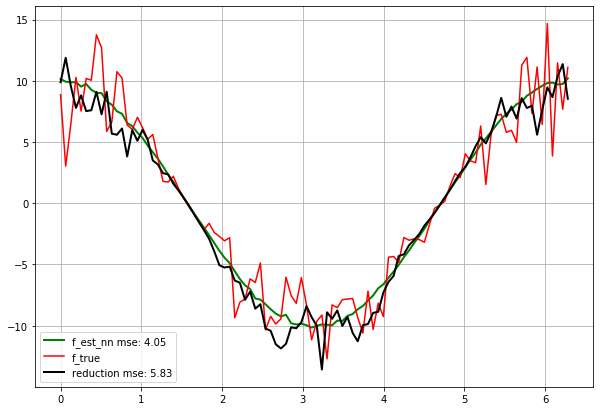

In [471]:
xi_proba, x_range , x_proba = generate_xi_ver_2()
xi_proba = xi_proba.T
x_proba = x.T
xi_t = torch.from_numpy(xi_proba.astype(np.float32))
predict_est = model_simple(xi_t)

predict_lin = model_lin(xi_t)

est_reduction = estimate_f_ver_2(model = model_ver_3(), xi = xi_proba.T)
mse_reduction = mse(np.squeeze(x_proba), np.squeeze(est_reduction))
mse_nn = mse(np.squeeze(x_proba), np.squeeze(predict_est.detach().numpy().T))
mse_nn_lin = mse(np.squeeze(x_proba), np.squeeze(predict_lin.detach().numpy().T))

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), predict_est.detach().numpy().T, 
                    c = 'green', label = 'f_est_nn mse: {}'.format(round(mse_nn, 2)), linewidth  = 2.)
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), np.squeeze(x_proba), c = 'r', label = 'f_true')

#ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), predict_lin.detach().numpy().T, 
#        c = 'gray', label = 'f_est_nn_lin mse: {}'.format(round(mse_nn_lin, 2)))

ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), est_reduction, 
        c = 'black', label = 'reduction mse: {}'.format(round(mse_reduction, 2)), linewidth  = 2.)
ax.grid()
ax.legend()

In [472]:
# another example

In [595]:
N = 500
x_list_signals = []
xi_list_signals = []
for i in range(N):
    xi, _, x = gener_xi_better()
    x_list_signals.append(x)
    xi_list_signals.append(xi)

x_signals = np.asarray(x_list_signals, dtype = np.float32)
xi_signals = np.asarray(xi_list_signals,  dtype = np.float32)

In [596]:
x_signals.shape, xi_signals.shape

((500, 100, 1), (500, 129, 1))

In [597]:
x_signals = np.squeeze(x_signals)
xi_signals = np.squeeze(xi_signals)


In [598]:
xi_signals.shape, x_signals.shape

((500, 129), (500, 100))

In [599]:
xi_signals_t = torch.from_numpy(xi_signals)
x_signals_t = torch.from_numpy(x_signals)

In [600]:
xi_signals_t.shape

torch.Size([500, 129])

In [601]:
D_in = xi_signals[0].shape[0]
D_out = x_signals[0].shape[0]
H = 100
H1 = 200
D_in, D_out

(129, 100)

In [602]:
model_simple_new = torch.nn.Sequential(
                torch.nn.Linear(D_in, H),
                torch.nn.ReLU(),
                torch.nn.Linear(H, H1),
                torch.nn.ReLU(),
                torch.nn.Linear(H1, D_out)
                
)

In [603]:
D_in = xi_signals[0].shape[0]
size_list = [D_in, D_out]
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model_simple_new.parameters(), lr = 1e-5 * 3)
for t in range(5000):
    y_pred = model_simple_new(xi_signals_t)
    loss = criterion(y_pred, x_signals_t)
    if(t % 50 == 0):
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 31803.677734375
50 1610.735595703125
100 1868.642578125
150 1034.40625
200 709.0927734375
250 575.8072509765625
300 455.0273132324219
350 365.98907470703125
400 362.3509521484375
450 445.0221862792969
500 376.476806640625
550 247.2823028564453
600 246.51519775390625
650 285.3585205078125
700 193.92161560058594
750 248.598876953125
800 197.67774963378906
850 178.1924591064453
900 195.14987182617188
950 169.93399047851562
1000 137.60140991210938
1050 120.12616729736328
1100 181.55673217773438
1150 153.36729431152344
1200 106.24334716796875
1250 106.86610412597656
1300 139.02835083007812
1350 95.17900085449219
1400 111.808837890625
1450 128.9275360107422
1500 135.850830078125
1550 77.58990478515625
1600 78.13810729980469
1650 104.41958618164062
1700 96.0081787109375
1750 78.04600524902344
1800 95.96121978759766
1850 78.5838851928711
1900 84.50180053710938
1950 56.52540969848633
2000 106.35197448730469
2050 79.38124084472656
2100 78.73184204101562
2150 69.51820373535156
2200 82.148147583

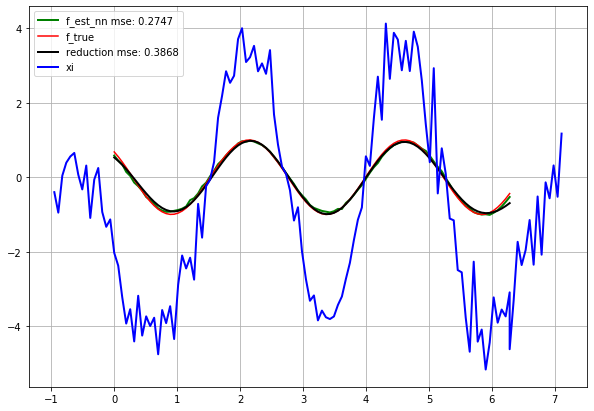

In [616]:
xi_proba, x_range , x_proba = gener_xi_better(l = l_new, samples = 1)
A_n, S_nu_n, f_0_n, F_n = model_better(l = 30, sigma = Sigma)
xi_proba = xi_proba.T
x_proba = x_proba.T
xi_t = torch.from_numpy(xi_proba.astype(np.float32))
predict_est = model_simple_new(xi_t)

#predict_lin = model_lin(xi_t)

est_reduction = estimate_f_ver_2(model = (A_n, S_nu_n, f_0_n, F_n), xi = xi_proba.T)
mse_reduction = mse(np.squeeze(x_proba), np.squeeze(est_reduction))
mse_nn = mse(np.squeeze(x_proba), np.squeeze(predict_est.detach().numpy().T))

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), predict_est.detach().numpy().T, 
                    c = 'green', label = 'f_est_nn mse: {}'.format(round(mse_nn, 4)), linewidth  = 2.)
ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), np.squeeze(x_proba), c = 'r', label = 'f_true')

ax.plot(np.linspace(0, 2 * np.pi, n_points_of_range), est_reduction, 
        c = 'black', label = 'reduction mse: {}'.format(round(mse_reduction, 4)), linewidth  = 2.)

ax.plot(x_range, xi_proba.T, 
        c = 'b', label = 'xi'.format(round(mse_reduction, 2)), linewidth  = 2.)
ax.grid()
ax.legend()

In [606]:
n = 100
mse_total_red = 0
mse_total_nn = 0

diff_red = np.zeros((n_points_of_range, ))
diff_nn = np.zeros((n_points_of_range, ))

for i in range(n):
    xi, _, f = gener_xi_better(l = 30, samples = 1)
    xi = xi.T
    xi_t = torch.from_numpy(xi.astype(np.float32))
    A, S_nu, f_0, F = model_better(l = 30, sigma = Sigma)
    est_red = estimate_f_ver_2(model = (A, S_nu, f_0, F), xi = xi.T)
    est_nn = model_simple_new(xi_t)
    diff_red += np.abs(np.squeeze(f) - np.squeeze(est_red))
    diff_nn += np.abs(np.squeeze(f) - np.squeeze(est_nn.detach().numpy()))
    mse_c_red = mse(np.squeeze(f), np.squeeze(est_red))
    mse_c_nn = mse(np.squeeze(f), np.squeeze(est_nn.detach().numpy().T))
    mse_total_nn += mse_c_nn
    mse_total_red += mse_c_red
    
    if i % 10 == 0:
        print('mse reduction current: {}\nmse nn current'.format(mse_c_red, 
                                                                mse_c_nn))
    
print("\n\n\n mse reduction: {}".format(round(mse_total_red/n, 4)))
print(" mse nn: {}".format(round(mse_total_nn/n, 4)))
    

mse reduction current: 0.16749502595620347
mse nn current
mse reduction current: 0.14681153759067947
mse nn current
mse reduction current: 0.10341081762901717
mse nn current
mse reduction current: 0.23286421606933275
mse nn current
mse reduction current: 0.3056182532546265
mse nn current
mse reduction current: 0.1330021384714933
mse nn current
mse reduction current: 0.45800318069780704
mse nn current
mse reduction current: 0.14923995478682453
mse nn current
mse reduction current: 0.12797338825313728
mse nn current
mse reduction current: 0.2345044128067626
mse nn current



 mse reduction: 0.3482
 mse nn: 0.2613


$ \frac{1}{N} \sum_{i = 1}^{N} \|F_{ANN}(\xi_{i}| W, b) - f_{i}\|^{2}  $

\begin{pmatrix}
  \alpha_{L}& 0 & ... & 0 & 0\\
  \alpha_{L-1} & \alpha_{L} & 0 & ... & 0 \\
  ... & ... & ... & ... \\ 
  \alpha_{1} & ... & \alpha_{L} & ... & 0 \\ 
  ... & ... & ... & ...\\
  0 & ... & \alpha_{1} & ... & \alpha_{L} \\
  0 & 0 & ... & ... & \alpha_{1}  \\
\end{pmatrix}  \begin{pmatrix}
                x_{1} \\
                x_{2} \\
                ... \\
                x_{N-1}\\
                x_{N}
\end{pmatrix}

где значения $\alpha_{1}, \alpha_{2}, \alpha_{L}, \alpha_{L-1} - $ малы 

Значения компонент сигнала $\xi$ с индексами 1, 2, m-1, m, будет состоять приблизительно из адитивного шума 

$\xi $

In [609]:
diff_nn = diff_nn/N
diff_red = diff_red/N

In [611]:
diff_red

array([0.02781618, 0.02416716, 0.02062209, 0.01723933, 0.01418566,
       0.01169598, 0.00976974, 0.00838251, 0.00789908, 0.00785982,
       0.00784493, 0.00795331, 0.00801513, 0.00810114, 0.00817907,
       0.00815952, 0.00800447, 0.00772656, 0.00740778, 0.00713759,
       0.00693121, 0.00694552, 0.00700759, 0.00713334, 0.00711077,
       0.00700092, 0.00682027, 0.00665837, 0.00656581, 0.00658918,
       0.00662437, 0.00663515, 0.0066463 , 0.00661542, 0.00666732,
       0.00675199, 0.00687864, 0.00697887, 0.00705278, 0.00721332,
       0.00734242, 0.00727577, 0.00707298, 0.00684266, 0.00659174,
       0.00649113, 0.00650181, 0.00660445, 0.00664868, 0.00668653,
       0.00668687, 0.00666532, 0.0066774 , 0.00661924, 0.00658937,
       0.00646244, 0.00645008, 0.00649354, 0.00650085, 0.0064368 ,
       0.0062182 , 0.00598921, 0.00606378, 0.00611766, 0.00628253,
       0.00656763, 0.00702931, 0.00749075, 0.00795297, 0.00831937,
       0.00863905, 0.00883568, 0.00894935, 0.00900446, 0.00889

In [617]:
operator_A_ver_3(n = 10, l = 4)

array([[0.1295176 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1295176 , 0.35206533, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1295176 , 0.35206533, 0.35206533, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1295176 , 0.35206533, 0.35206533, 0.1295176 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.1295176 , 0.35206533, 0.35206533, 0.1295176 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.1295176 , 0.35206533, 0.35206533,
        0.1295176 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1295176 , 0.35206533,
        0.35206533, 0.1295176 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       